[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biniyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biniyam\AppData\Roaming\nltk_data...


can not caluclate similarty on unbalanced keywords
101


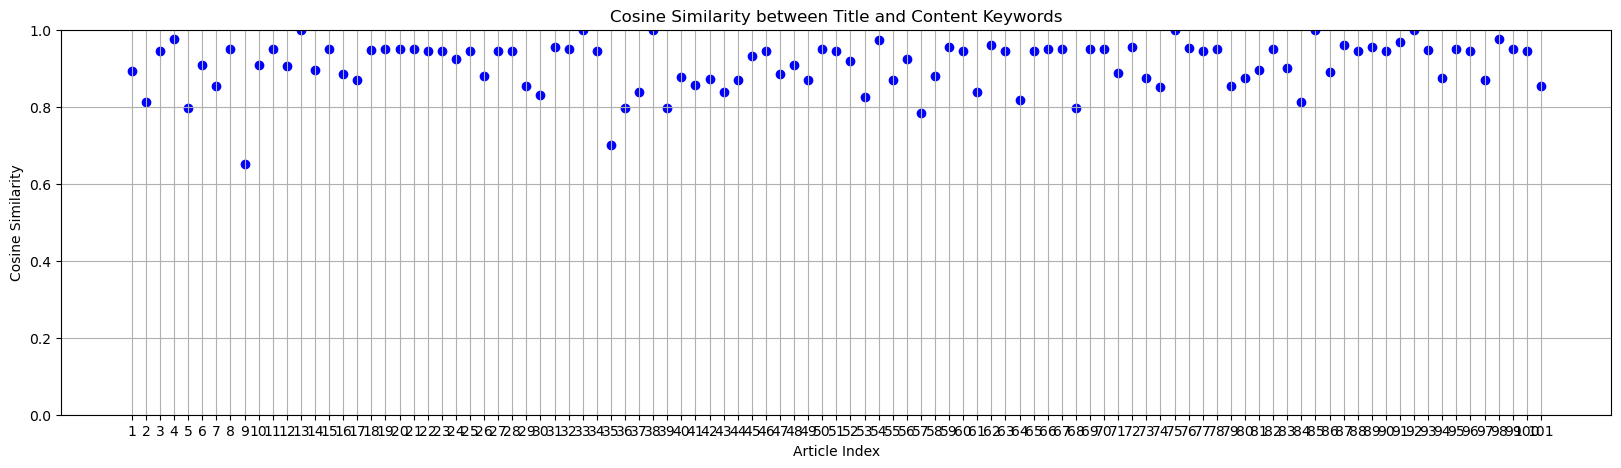

In [4]:
import sys, os
if os.path.abspath("..") not in sys.path:
    sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import keyword_extraction_and_analysis
from src.loader import NewsDataLoader

loader = NewsDataLoader()
news_data = loader.load_data('../data/data.csv/rating.csv')

title_vector, content_vector,cosine_similarity = keyword_extraction_and_analysis(news_data)
print(len(cosine_similarity))

plt.figure(figsize=(20, 5))
plt.scatter(range(1, len(cosine_similarity)+1), cosine_similarity, color='blue')
plt.xlabel('Article Index')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between Title and Content Keywords')
plt.xticks(range(1, len(cosine_similarity)+1))
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1] for similarity score
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data from CSV files
data = pd.read_csv('C:/Users/HP/Desktop/KARUGIII/data.csv/rating.csv')
domains_location = pd.read_csv('C:/Users/HP/Desktop/KARUGIII/domains_location.csv')

# Extract headlines and news bodies
headlines = data['title'].tolist()
news_bodies = data['content'].tolist()

# Combine headlines and news bodies
text_data = [f"{headline} {news_body}" for headline, news_body in zip(headlines, news_bodies)]

# Set the sample size
sample_size = 100

# Down-sample the data to a sample size of 100
if len(text_data) > sample_size:
    text_data = text_data[:sample_size]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

## Perform analysis
# For example, calculate the top N most important words using TF-IDF scores

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF scores for each feature (word)
tfidf_scores = X.toarray()

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = tfidf_scores.mean(axis=0)

# Sort the words based on their mean TF-IDF scores in descending order
sorted_words_indices = mean_tfidf_scores.argsort()[::-1]

# Print the top N most important words and their TF-IDF scores
top_n = 10
print(f"Top {top_n} most important words:")
for i in range(top_n):
    word_index = sorted_words_indices[i]
    word = feature_names[word_index]
    tfidf_score = mean_tfidf_scores[word_index]
    print(f"{word}: {tfidf_score}")

Top 10 most important words:
the: 0.07521244007411275
to: 0.05110932088798397
of: 0.04837162851338603
in: 0.04371437474730651
and: 0.04339376494517135
on: 0.032849064844609505
chars: 0.032717766873407
maldives: 0.03203666592134964
for: 0.030289572196611755
as: 0.028385765907014263


In [18]:
topic_model.visualize_barchart(width=280,height=330,top_n_topics=8,n_words=10)

added document document cluster heat map by topic

In [20]:

topic_model.visualize_documents(sampled_list,topics=list(range(30)),custom_labels=True,height=600)